<a href="https://colab.research.google.com/github/sissilin1027/Deep_Learning-/blob/main/NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAA9MKD/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAA9MKD/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAA9MKD/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),

    # Model Definition with Conv1D
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),

    # Model Definition with LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    # Model Definition with GRU
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),

    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [8]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 69s 176ms/step - loss: 0.5748 - accuracy: 0.6930 - val_loss: 0.6917 - val_accuracy: 0.5027
Epoch 2/10
391/391 [==============================] - 70s 178ms/step - loss: 0.5335 - accuracy: 0.7318 - val_loss: 0.5499 - val_accuracy: 0.7350
Epoch 3/10
391/391 [==============================] - 71s 182ms/step - loss: 0.3743 - accuracy: 0.8474 - val_loss: 0.4429 - val_accuracy: 0.8042
Epoch 4/10
391/391 [==============================] - 71s 181ms/step - loss: 0.2864 - accuracy: 0.8882 - val_loss: 0.4385 - val_accuracy: 0.8111
Epoch 5/10
391/391 [==============================] - 70s 180ms/step - loss: 0.2264 - accuracy: 0.9160 - val_loss: 0.3925 - val_accuracy: 0.8369
Epoch 6/10
391/391 [==============================] - 70s 180ms/step - loss: 0.2130 - accuracy: 0.9211 - val_loss: 0.4422 - val_accuracy: 0.8315
Epoch 7/10
391/391 [==============================] - 71s 183ms/step - loss: 0.2360 - accuracy: 0.9059 - val_loss: 0.5056 - val_ac

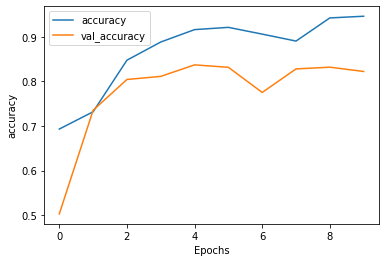

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')


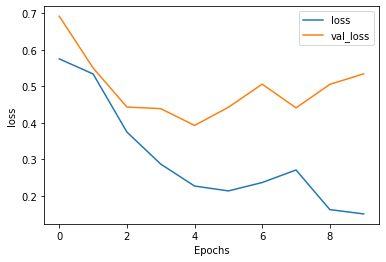

In [11]:
plot_graphs(history, 'loss')